<a href="https://colab.research.google.com/github/svanlinden/test/blob/master/forecast_opl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Forecast demo Revisited
------------------------

We willen de opbrengsten van een bedrijf per kwartaal van de laatste 5 jaar kunnen voorspellen (cfr. hoofdstuk Forecasting uit Data Science 1).
Deze dataset is erg klein en daarom kunnen we geen validatie-set of test-set construeren.

a) Lees de dataset van de Forecasting in (forecastdemo.csv)

In [ ]:
forecast_demo = pd.read_csv('../datasets/forcastdemo.csv')
forecast_demo.head()

,index,quarter,revenue
0,1,1,20
1,2,2,100
2,3,3,175
3,4,4,13
4,5,1,37


b) Wat voor soort voorspelling trachten we hier te doen? Regressie of classificatie?

In [ ]:
# Regressie

c) In tegenstelling tot de technieken uit DS1 - Lineaire Regressie kunnen we nu meer kolommen gebruiken als onafhankelijke variabele. Welke kolom kunnen we nu extra gebruiken?

In [ ]:
# We kunnen nu ook quarter als extra input gebruiken.
# Wil je de NN-techniek kunnen vergelijken met de technieken uit DS1 - Lineaire Regressie dan zou je quarter kunnen weglaten, 
# enkel de index gebruiken (kan je zelf eens  proberen).

d) Maak nu een input training-set X_train. Doe hetzelfde voor de targetkolom, en noem deze y_train.

In [ ]:
X_train = forecast_demo[['index', 'quarter']]
y_train = forecast_demo.revenue

e) Maak een neuraal netwerk met de correcte inputs en outputs. Voeg een laag toe die de normalisatie van de input voor zijn rekening neemt. Denk ook goed na over welke activatiefuncties je nodig zal hebben. Voor een regressie zijn niet alle activatiefuncties zijn gepast.

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2)                 8         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 1)               

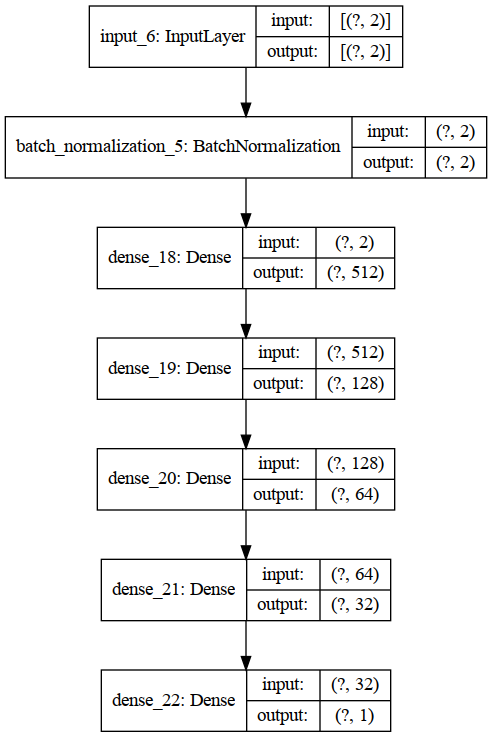

In [ ]:
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

inputs = Input(shape=(2,))
x = BatchNormalization()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.summary()
keras.utils.plot_model(model,to_file='images/oefening2.png', show_shapes=True)
Image('images/oefening2.png')

f) Compileer je model.
* Welke kostenfunctie (loss) zal je hier gebruiken. Zoek eventueel de <a href="https://keras.io/api/losses/">beschikbare kostenfunctie</a> op.
* Welke optimizer(s) ga je gebruiken? Zoek eventueel op welke de <a href="https://keras.io/api/optimizers/">beschikbare zijn</a> en experimenteer.
* Welke <a href="https://keras.io/api/metrics/">metric</a> ga je gebruiken?

In [ ]:
model.compile(
    loss=keras.losses.mean_squared_error, # of keras.losses.mean_absolute_percentage_error, keras.losses.mean_absolute_error
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.mean_absolute_percentage_error # of keras.metrics.mean_absolute_error, keras.metrics.mean_squared_error
)

g) Train je neuraal netwerk en bekijk via 'PlotLossesKeras' de resultaten. Je zou tot een **arbitraire kleine fout** moeten kunnen geraken, dus zo klein als jij het wil mits voldoende training en aanpassing aan het NN.
* Hoeveel epochs ga je gebruiken. Experimenteer hiermee.
* Welke batch size? Idem.
* Pas eventueel de eigenschappen van je NN uit e) aan.

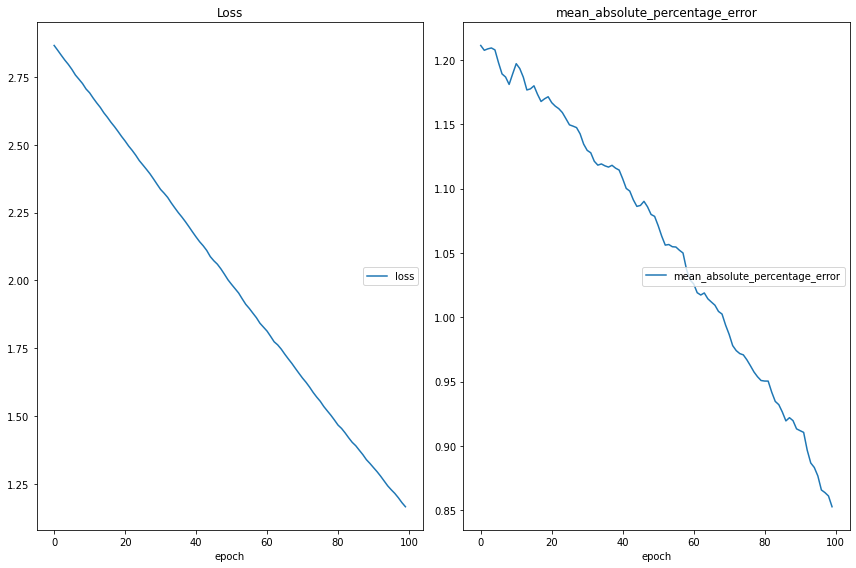

Loss
	loss             	 (min:    1.166, max:    2.866, cur:    1.166)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:    0.853, max:    1.211, cur:    0.853)


In [ ]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train,
                    batch_size=20, # gelijk aan grootte van deze kleine dataset is goed
                    epochs=100,  # vanaf 5000 wordt het resultaat redelijk goed, je kan blijven bijtrainen
                    callbacks=[PlotLossesKeras()],
                    verbose=False)

h) Test de kwaliteit van je neurale netwerk
* Evalueer je model met de <code>evaluate</code>-methode
* Gebruik je neuraal netwerk om de opbrengsten te voorspellen die horen bij X_train. Komen ze overeen met de werkelijke opbrengsten?


In [ ]:
import matplotlib.pyplot as plt
model.evaluate(X_train, y_train)
y_hat = model.predict(X_train)

1/1 [==============================] - 0s 2ms/step - loss: 1.1641 - mean_absolute_percentage_error: 0.8826


i) Maak één plot van de originele gegevens (zwart) en de voorspelde (rood).

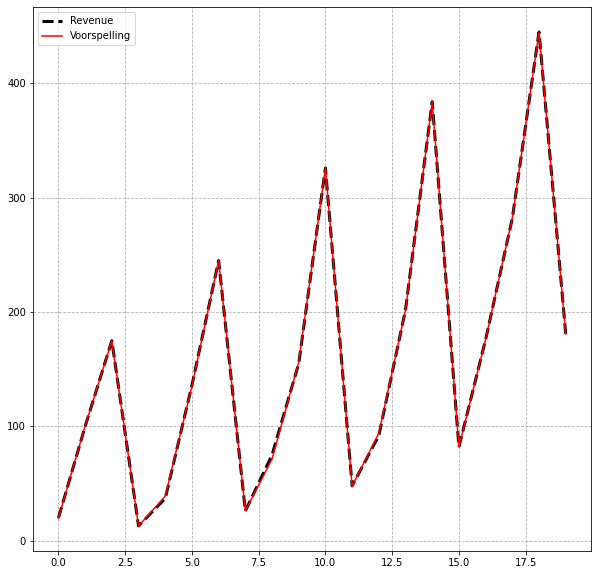

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(forecast_demo.index, forecast_demo.revenue, c='black',linestyle='--', lw=3, label='Revenue')
ax.plot(forecast_demo.index, y_hat,c='red', label='Voorspelling')
ax.legend()
ax.grid(linestyle='--')
